<a href="https://colab.research.google.com/github/nofarmordehai/song-lyrics-similarity-matrix/blob/master/song_lyrics_similarity_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Every song have a matrix :)**

**step 0:** Run the following two lines; import the necessary libraries and connect to your Google Drive.

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**step 1:** run this functions

! change "allowed" variable in "clean_word" function, if you want lyrics to songs in a language other than Hebrew or English

lyrics -> list of clean words (without punctuation etc.) -> similarity matrix (matrix[i, j] = 1 if song_words[i] == song_words[j]) -> plot this matrix

        

# functions

In [ ]:
# song words list

def create_song_words_lst(path):
  file = open(path, "r")
  lst = []
  for line in file:
    stripped_line = line.strip()
    for word in stripped_line.split():
      clean = clean_word(word)
      lst.append(clean)
  file.close()
  return lst

def clean_word(word):
  clean = word.replace(u'\u200e', '')
  clean = clean.lower()
  # change "allowed" if you want other than Hebrew or English
  allowed = 'abcdefghijklmnopqrstuvwxyz0123456789אבגדהוזחטיכלמנסעפצקרשתםףץן'
  for ch in word:
    if ch not in allowed:
      clean = clean.replace(ch, '')
  return(clean)

In [ ]:
# song matrix 

def create_song_matrix(song_words):
  size = len(song_words)
  matrix = np.zeros((size, size))
  for i in range(size):
    for j in range(size):
      if song_words[i] == song_words[j]:
        matrix[i, j] = 1
  return matrix

In [ ]:
# plot matrix
# https://matplotlib.org/3.1.1/tutorials/colors/colormap-manipulation.html

def create_song_plot(data):
    top = cm.get_cmap('Oranges_r', 128)
    bottom = cm.get_cmap('Blues', 128)
    newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
    cmap = ListedColormap(newcolors, name='OrangeBlue')
    
    fig, ax = plt.subplots(1, 1, figsize=(7, 7), constrained_layout=True)
    psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-1, vmax=1)
    #fig.colorbar(psm, ax=ax)
    plt.show()

In [ ]:
# repetition ratio = count repetition/matrix size (minus the diagonal)

def clac_repetition_ratio(song_matrix):
  size = song_matrix.shape[0]
  sum_mat = np.sum(song_matrix)
  repeat = (sum_mat-size)/((size*size)-size)
  return round((repeat*100),2)

In [166]:
# all process together 

def from_song_lyrics_to_plot(path):
  words = create_song_words_lst(path)
  #print(words)
  #print("The song has",len(words),"words")
  #print(set(words))
  #print("The song has",len(set(words)),"uniqe words")
  
  song_matrix = create_song_matrix(words)
  create_song_plot(song_matrix)
  print(clac_repetition_ratio(song_matrix),'% repetition ratio')

# try it!

**step 2:** Change folder path, song name and insert there song lyrics txt file 

In [170]:
main_path = '/content/drive/My Drive/Colab Notebooks/song_matrix/' #'/content/drive/My Drive/...' complete your drive path
#song_name = "million dollar.txt" # 3.6% Noa Kirel - million dollar
song_name = "all you need is love.txt" # 10.9%

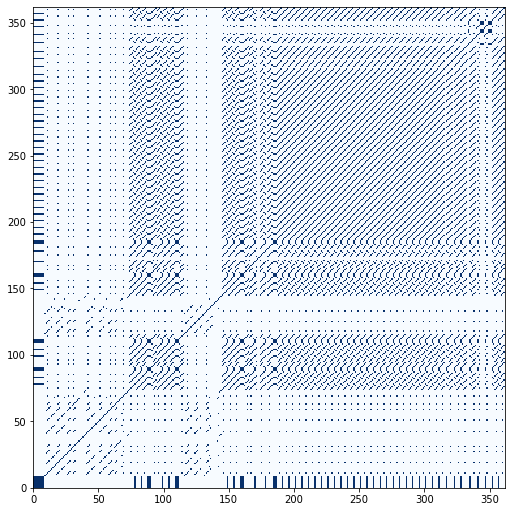

10.98 % repetition ratio


In [171]:
from_song_lyrics_to_plot(main_path + song_name)